In [79]:
! pip install pandas
! pip install xlrd
! pip install seaborn
! pip install matplotlib
! pip install numpy
! pip install scikit-learn
! pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 447.2 kB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 3

НИУ ВШЭ НН. Факультет ИМиКН. Методы анализа данных.
Charge de cours:  В.А. Калягин.


Домашнее задание 1: данные, пропуски, выбросы, методы снижения размерности (PCA, MDS)
Провести необходимые вычисления. Полученные результаты снабдить подробным комментарием.

Выполнили:  Сергей Бараненков
            Асет Ботайбеков

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
import numpy as np

In [3]:
columns = ['age', 'dependents', 'income', 'residence', 'appraisal', 'credit']

In [4]:
pd.DataFrame(data = {
    columns[0]: ['Возраст (лет)'],
    columns[1]: ['Количество иждевенцев'],
    columns[2]: ['Доход (руб / мес)'],
    columns[3]: ['Срок проживания в регионе(лет)'],
    columns[4]: ['Оценка автомобиля заемщика'],
    columns[5]: ['Размер кредита'],
})

,age,dependents,income,residence,appraisal,credit
0,Возраст (лет),Количество иждевенцев,Доход (руб / мес),Срок проживания в регионе(лет),Оценка автомобиля заемщика,Размер кредита


In [5]:
df = pd.read_excel('resources/22MAG_HW_1_v7.xls', names=columns, header=None)

In [6]:
df

,age,dependents,income,residence,appraisal,credit
0,54.0,3.0,16700.0,18.0,18000.0,177000.0
1,36.0,2.0,33800.0,NaN,34000.0,337000.0
2,NaN,1.0,12900.0,9.0,12000.0,126000.0
3,44.0,2.0,17700.0,13.0,18000.0,180000.0
4,54.0,4.0,20000.0,19.0,22000.0,211000.0
5,41.0,NaN,11900.0,11.0,12000.0,119000.0
6,31.0,1.0,22700.0,4.0,22000.0,221000.0
7,28.0,1.0,NaN,2.0,30000.0,300000.0
8,45.0,2.0,12600.0,13.0,13000.0,128000.0
9,25.0,1.0,31900.0,0.0,30000.0,NaN


# Задание 1

Среднее (mean), Стандартное отклонение (std), Квартили (25%, 50%, 75%)

In [7]:
df.describe()

,age,dependents,income,residence,appraisal,credit
count,49.000000,50.000000,49.000000,49.000000,49.000000,49.000000
mean,39.081633,2.000000,19432.653061,10.224490,20959.183673,198448.979592
std,8.946221,0.989743,10068.502614,4.917085,11479.981097,99720.664280
min,19.000000,0.000000,1500.000000,0.000000,0.000000,4000.000000
25%,33.000000,1.250000,12100.000000,7.000000,13000.000000,126000.000000
50%,40.000000,2.000000,16800.000000,11.000000,19000.000000,186000.000000
75%,46.000000,3.000000,28700.000000,14.000000,30000.000000,293000.000000
max,56.000000,4.000000,43300.000000,19.000000,50000.000000,437000.000000


Медиана

In [8]:
df.median()

age               40.0
dependents         2.0
income         16800.0
residence         11.0
appraisal      19000.0
credit        186000.0
dtype: float64

Построим распределения и графики вида ящик с усами

In [9]:
def plot_distributions(data_frame, plot_cols = 3):
    df_col_len = len(data_frame.columns)
    plot_rows = math.ceil(df_col_len / plot_cols)
    fig, axes = plt.subplots(plot_rows, plot_cols, sharex='none', sharey='none')
    fig.set_size_inches(26, 10)
    for i, column in enumerate(data_frame.columns):
        if plot_rows == 1:
            ax = axes[i % plot_cols]
        else:
            ax = axes[math.floor(i / plot_cols)][i % plot_cols]
        sns.histplot(
            data_frame[column],
            ax = ax,
            kde=True,
            stat = 'density',
            kde_kws=dict(cut=3)
        )
        ax.axvline(data_frame[column].mean(), c='k', ls='-', lw=2.5)
        ax.axvline(data_frame[column].median(), c='orange', ls='--', lw=2.5)

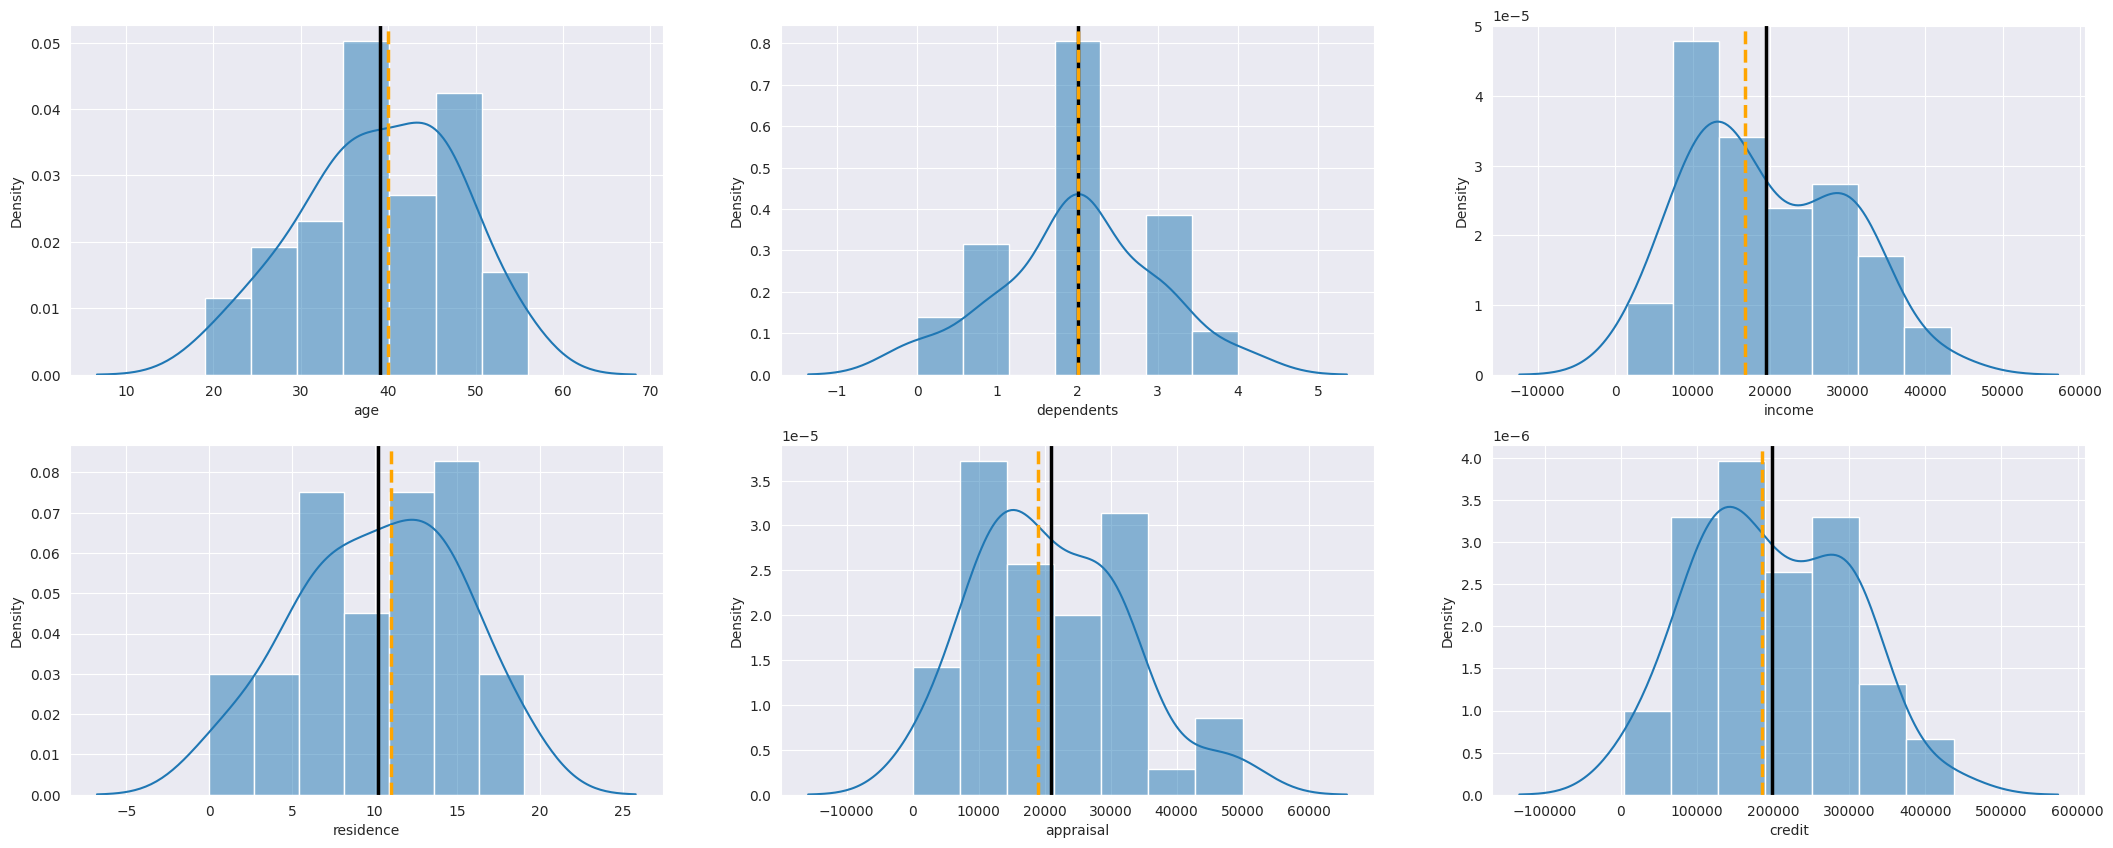

In [10]:
plot_distributions(df)

In [11]:
def plot_boxplots(data_frame, plot_cols = 3):
    df_col_len = len(data_frame.columns)
    plot_rows = math.ceil(df_col_len / plot_cols)
    fig, axes = plt.subplots(plot_rows, plot_cols, sharex='none', sharey='none')
    fig.set_size_inches(26, 10)
    for i, column in enumerate(df.columns):
        if plot_rows == 1:
            ax = axes[i % plot_cols]
        else:
            ax = axes[math.floor(i / plot_cols)][i % plot_cols]
        sns.boxplot(
            data_frame[column],
            ax = ax,
        ).set_title(column)

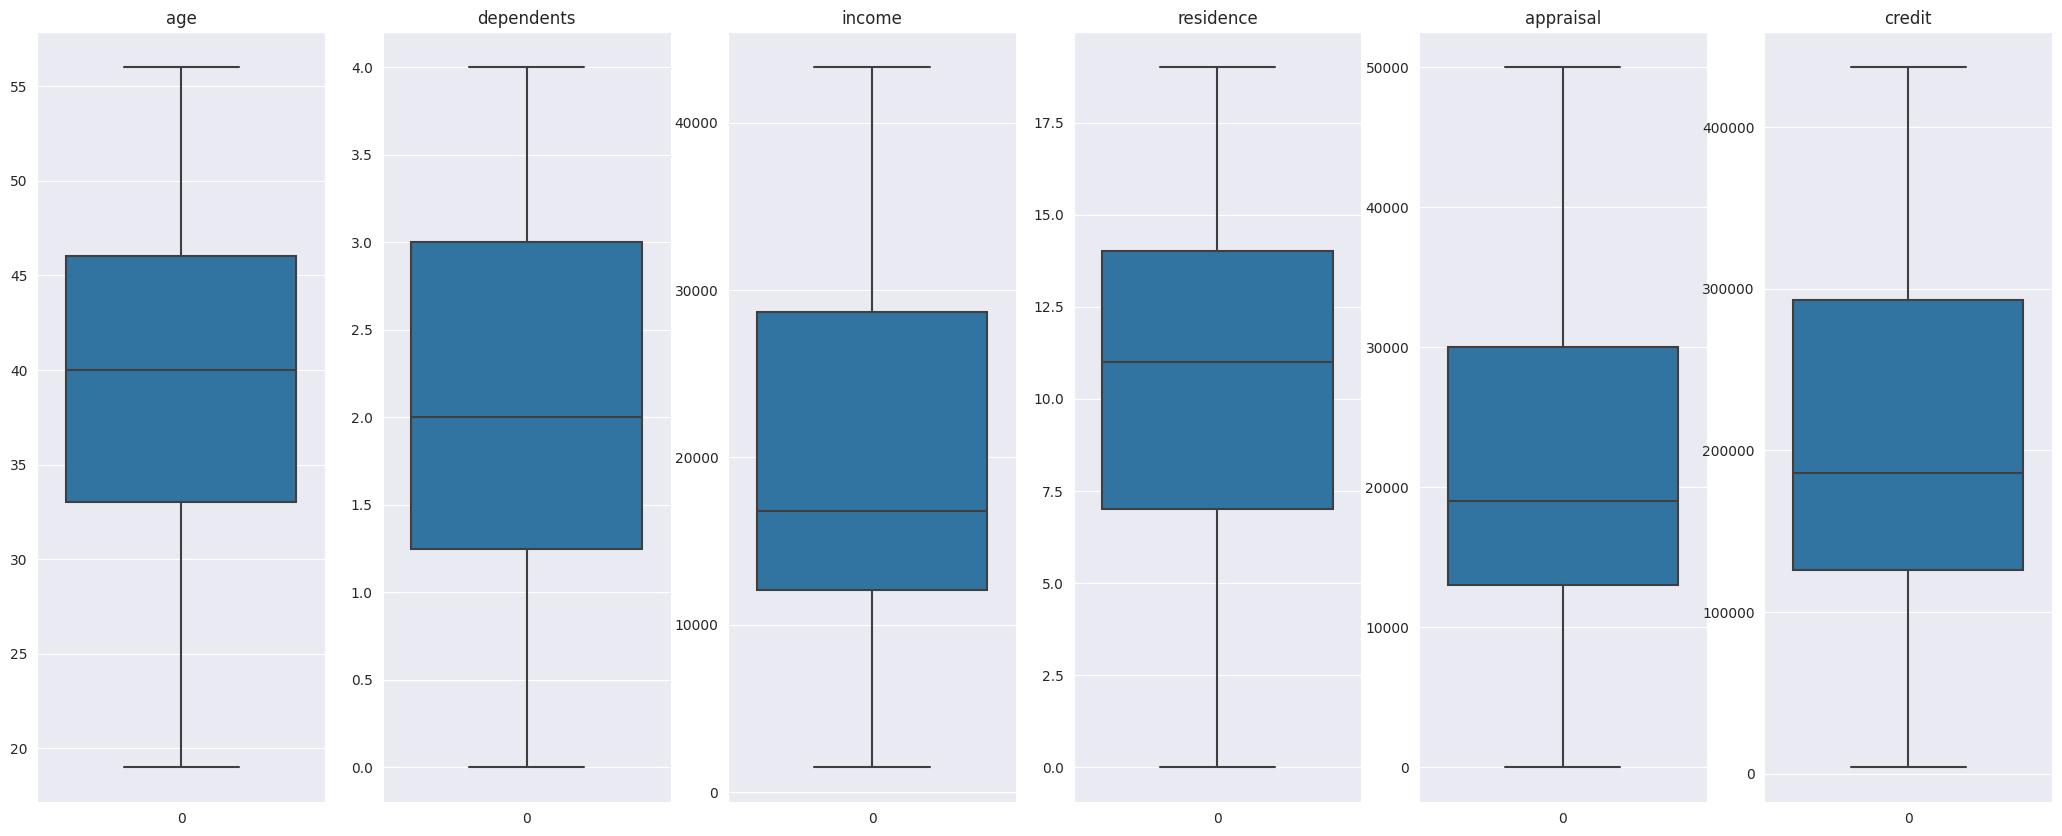

In [12]:
#Графики типа "ящик" с усами
plot_boxplots(df, plot_cols = 6)

Также проверим автокорреляцию, вдруг следующее наблюдение зависит от предыдущего

In [13]:
for column in df.columns:
    print(column, df[column].autocorr(lag = 1))

age 0.19289146966822976
dependents 0.04449847855675359
income 0.08699364481700528
residence 0.1975689812359535
appraisal 0.19677641073989915
credit 0.18967296901206915


Посмотрим количество уникальных значений в каждом признаке

In [14]:
df.nunique()

age           25
dependents     5
income        46
residence     18
appraisal     28
credit        47
dtype: int64

Посмотрим количество нулевых значений по каждому признаку

In [15]:
df.isnull().sum()

age           3
dependents    2
income        3
residence     3
appraisal     3
credit        3
dtype: int64

Посмотрим какой процент строк останется, если удалить все строки с хотя-бы одним пропущенным значением

In [16]:
(df.shape[0] - df.dropna().shape[0]) / df.shape[0]

0.3269230769230769

Аггрегируя полученные данные можно сделать предварительные выводы, а именно:

Все признаки кроме являются количественными

* age - непрерывный признак имеет близкое к нормальному распределению, медиана и среднее ~ 40, минимальный age в выборке = 19, максимальный 56. Признак имеет среднюю кардинальность в рамках этих данных.
* dependents - дискретный признак имеет близкое к нормальному распределению, медиана и среднее = 2. Минимальный dependends - 0, максимальный - 4. Признак имеет низкую кардинальность.
* income - непрерывный признак, мультимодальный. Медиана меньше чем среднее. Признак имеет высокую кардинальность.
* residence - непрерывный признак, имеет близкое к нормальному распределению. Признак имеет среднюю кардинальность.
* appraisal - непрерывный признак, двумодальный, имеет среднюю кардинальность, скорее всего содержит выбросы справа. Большой разброс значений
* credit - неприрывный признак, двумодальный. Признак имеет высокую кардинальность. Большой разброс значений

Каждый признак отсутствует в среднем в 3 строках. Нельзя просто удалить строки с хотя-бы одним пропущенным признаком - останется менее 33% от всех данных

Наблюдения независимы относительно предыдущих

# Задание 2

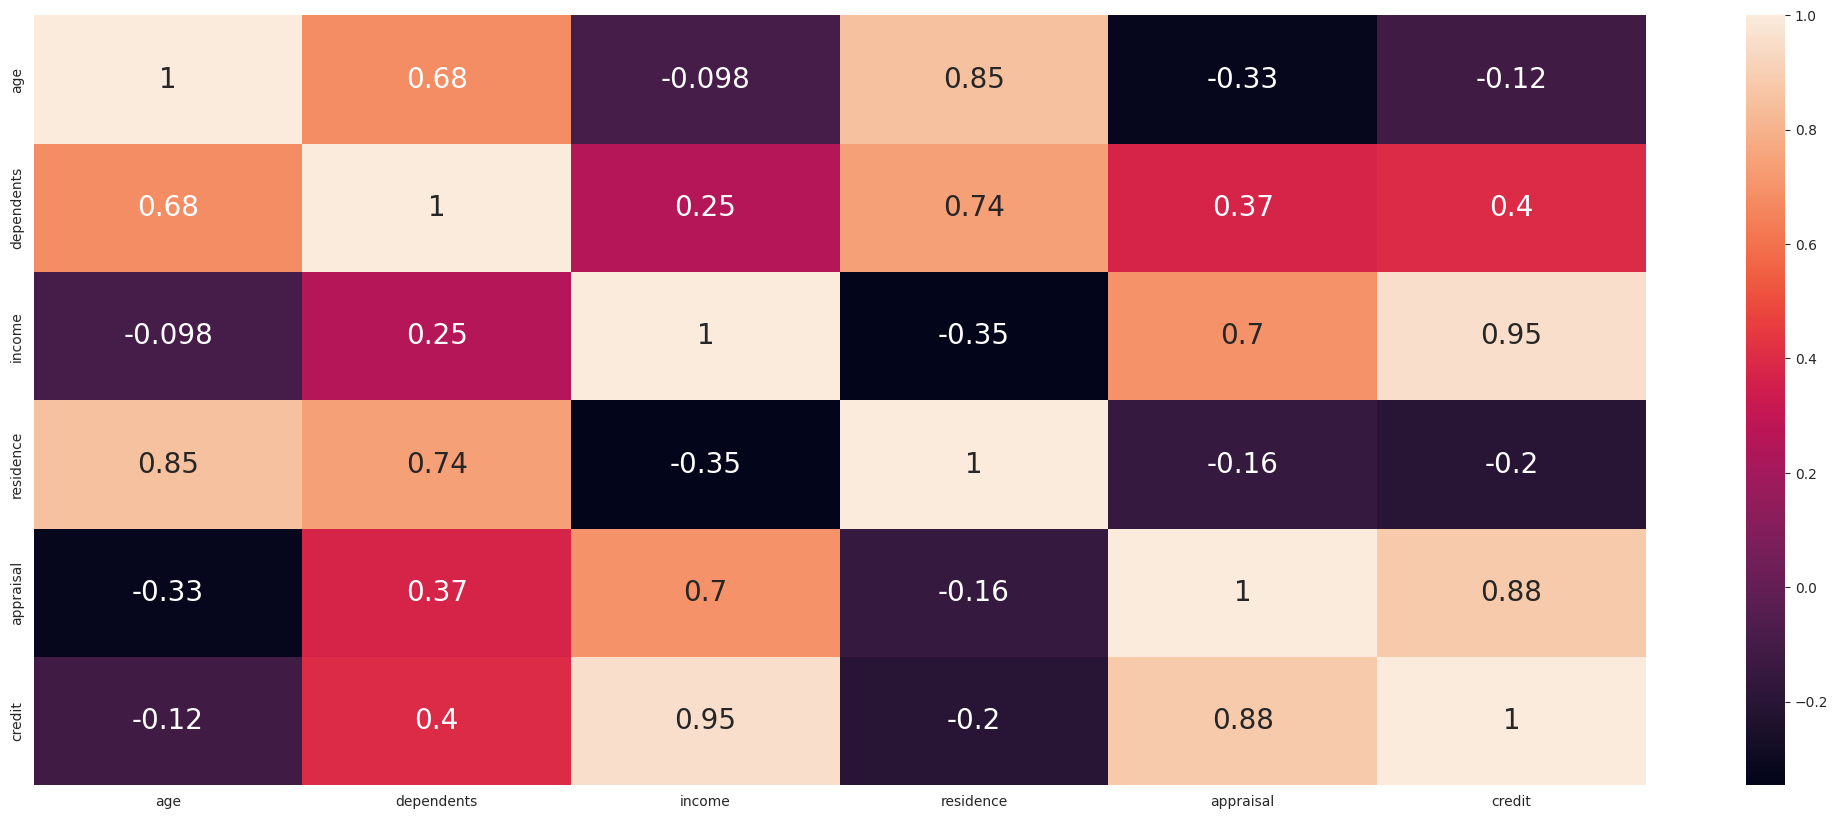

In [17]:
corr = df.corr()
plt.figure(figsize=(26,10))
fig = sns.heatmap(corr, annot=True, annot_kws={'size': 20})

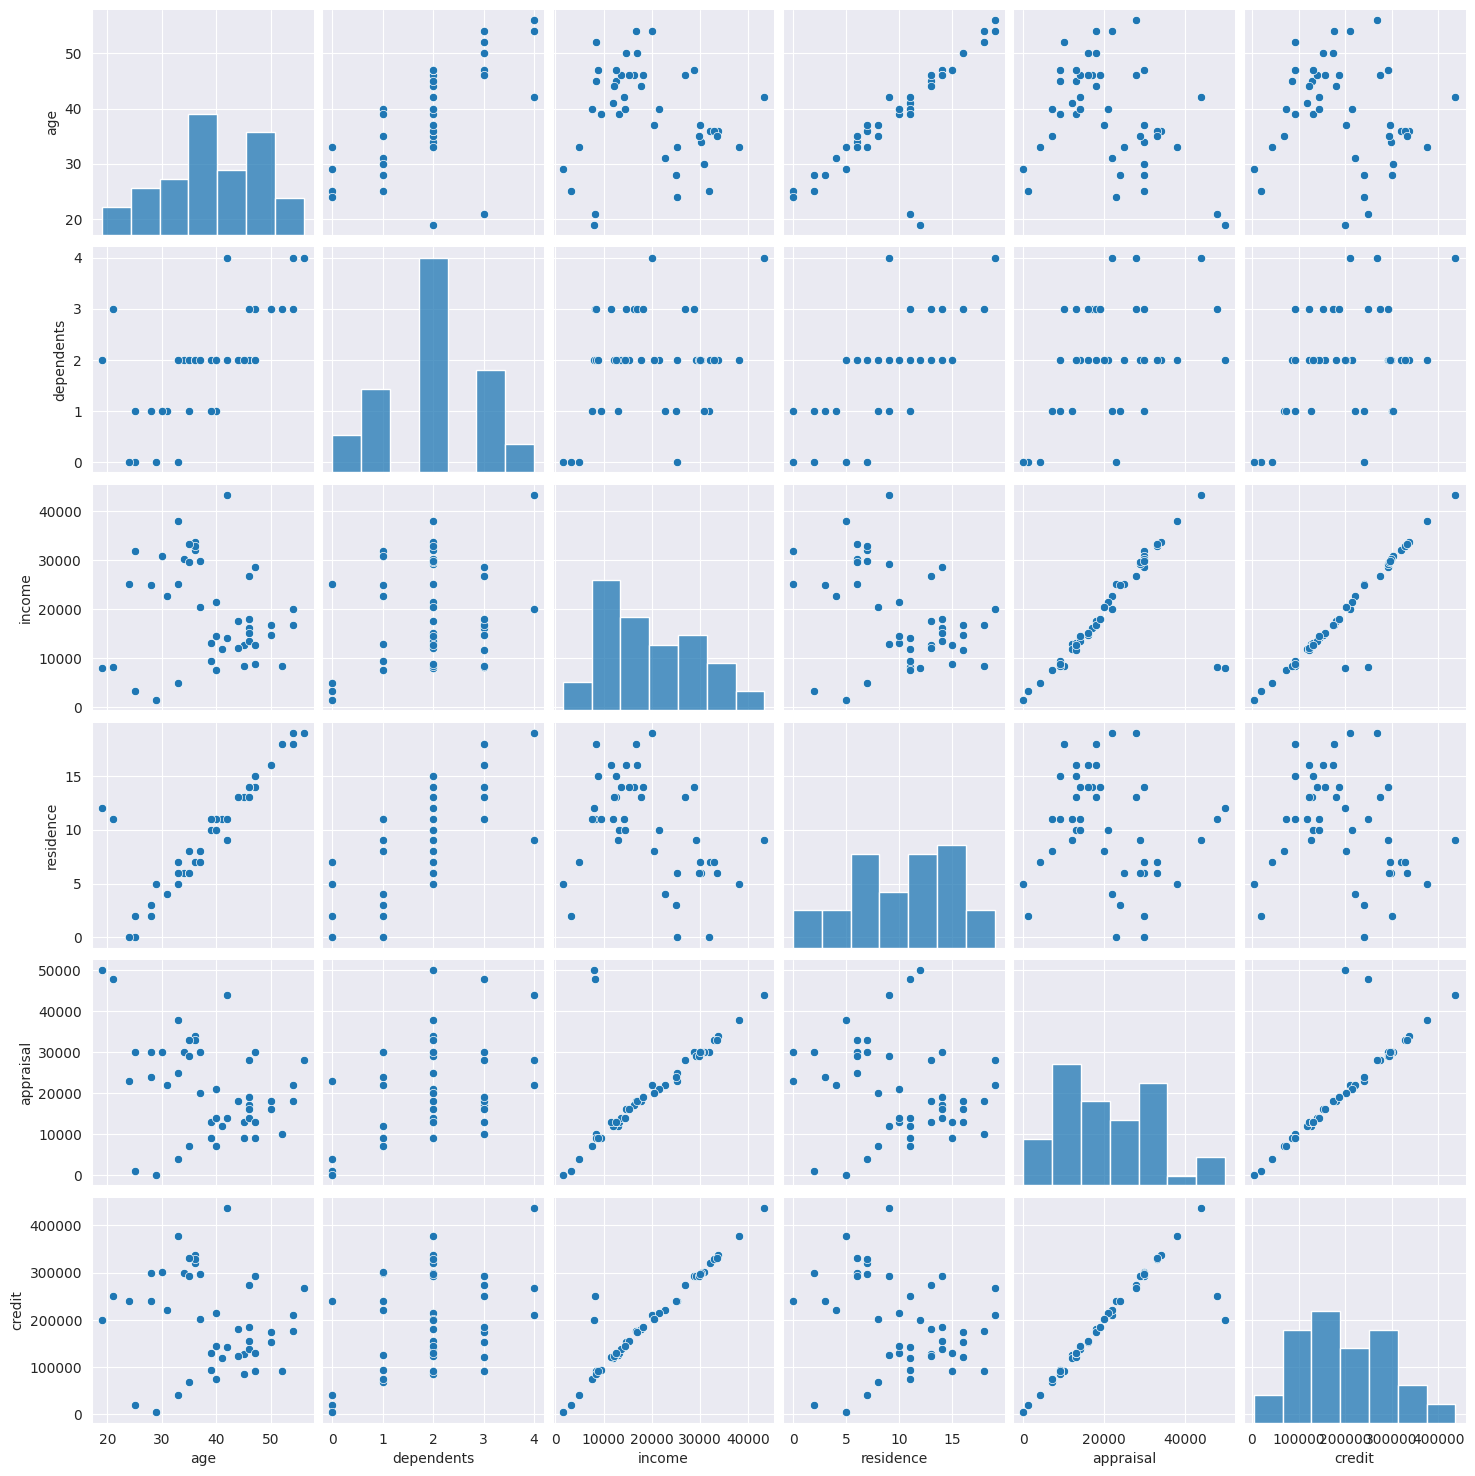

In [18]:
sns.pairplot(df)

Видим, что сильно линейно коррелируют признаки age, dependents и residence. Также имеют высокую прямую линейную корреляцию признаки income, appraisal и credit

Руководствуясь статьей http://www.nauteh-journal.ru/files/376f9ec6-f30e-4d2b-a61f-518fdfebb00f и http://itconf2016.omgtu.ru/wp-content/uploads/ultimatemember/1/%D0%A8%D0%B0%D0%BC%D1%80%D0%B8%D0%BA.pdf
было принято решение заполнить пропуски с помощью одномерной линейной регрессии

In [19]:
from sklearn.linear_model import LinearRegression

Будем последовательно заполнять пропущенные значения. В качестве x будем брать линейно зависимые признаки с восстанавливаемым признаком

In [20]:
# Функция заполняет пропущенные значения с помощью линейной регрессии, если указан параметр to_ceil - округляет вверх до инта
# Также если указаны min_val или max_val то значение будет не меньше чем min_val и не больше max_val соответственно
# Функция не будет работать если референсное значение не существует вместе с заполняемым, но нам повезло, таких строк нет :)

In [21]:
def fill_na_by_lr(data_frame, fill_col, fill_by_col, min_val = None, max_val = None, to_ceil = False):
    # строка - NaN ли fill_col
    with_null = data_frame[fill_col].isnull()
    fill_col_with_null = data_frame[with_null]

    if fill_col_with_null.shape[0] == 0:
        return # Нет пропущенных

    regressor = LinearRegression()
    fit_df = data_frame[[fill_col, fill_by_col]].dropna()

    regressor.fit(fit_df[fill_by_col].values.reshape(-1, 1), fit_df[fill_col])

    x = fill_col_with_null[fill_by_col].values.reshape(-1, 1)
    y = regressor.predict(x)

    if to_ceil:
        y = np.ceil(y)

    if min_val:
        y = np.maximum(y, np.repeat(min_val, y.shape[0]))

    if max_val:
        y = np.minimum(y, np.repeat(max_val, y.shape[0]))

    data_frame.loc[with_null, fill_col] = y

In [22]:
fill_na_by_lr(df, 'age', 'dependents', to_ceil=True, min_val=0, max_val=100)
fill_na_by_lr(df, 'dependents', 'residence', to_ceil=True, min_val=df['dependents'].min(), max_val=df['dependents'].max())
fill_na_by_lr(df, 'residence', 'age', to_ceil=True, min_val=df['residence'].min(), max_val=df['residence'].max())

fill_na_by_lr(df, 'income', 'credit', to_ceil=True, min_val=df['income'].min(), max_val=df['income'].max())
fill_na_by_lr(df, 'credit', 'income', to_ceil=True, min_val=df['credit'].min(), max_val=df['credit'].max())
fill_na_by_lr(df, 'appraisal', 'credit', to_ceil=True, min_val=df['appraisal'].min(), max_val=df['appraisal'].max())

In [23]:
df

,age,dependents,income,residence,appraisal,credit
0,54.0,3.0,16700.0,18.0,18000.0,177000.0
1,36.0,2.0,33800.0,9.0,34000.0,337000.0
2,33.0,1.0,12900.0,9.0,12000.0,126000.0
3,44.0,2.0,17700.0,13.0,18000.0,180000.0
4,54.0,4.0,20000.0,19.0,22000.0,211000.0
5,41.0,3.0,11900.0,11.0,12000.0,119000.0
6,31.0,1.0,22700.0,4.0,22000.0,221000.0
7,28.0,1.0,29110.0,2.0,30000.0,300000.0
8,45.0,2.0,12600.0,13.0,13000.0,128000.0
9,25.0,1.0,31900.0,0.0,30000.0,317646.0


Получаем датафрейм с заполненными значениями

Посмотрим как изменились гистограммы

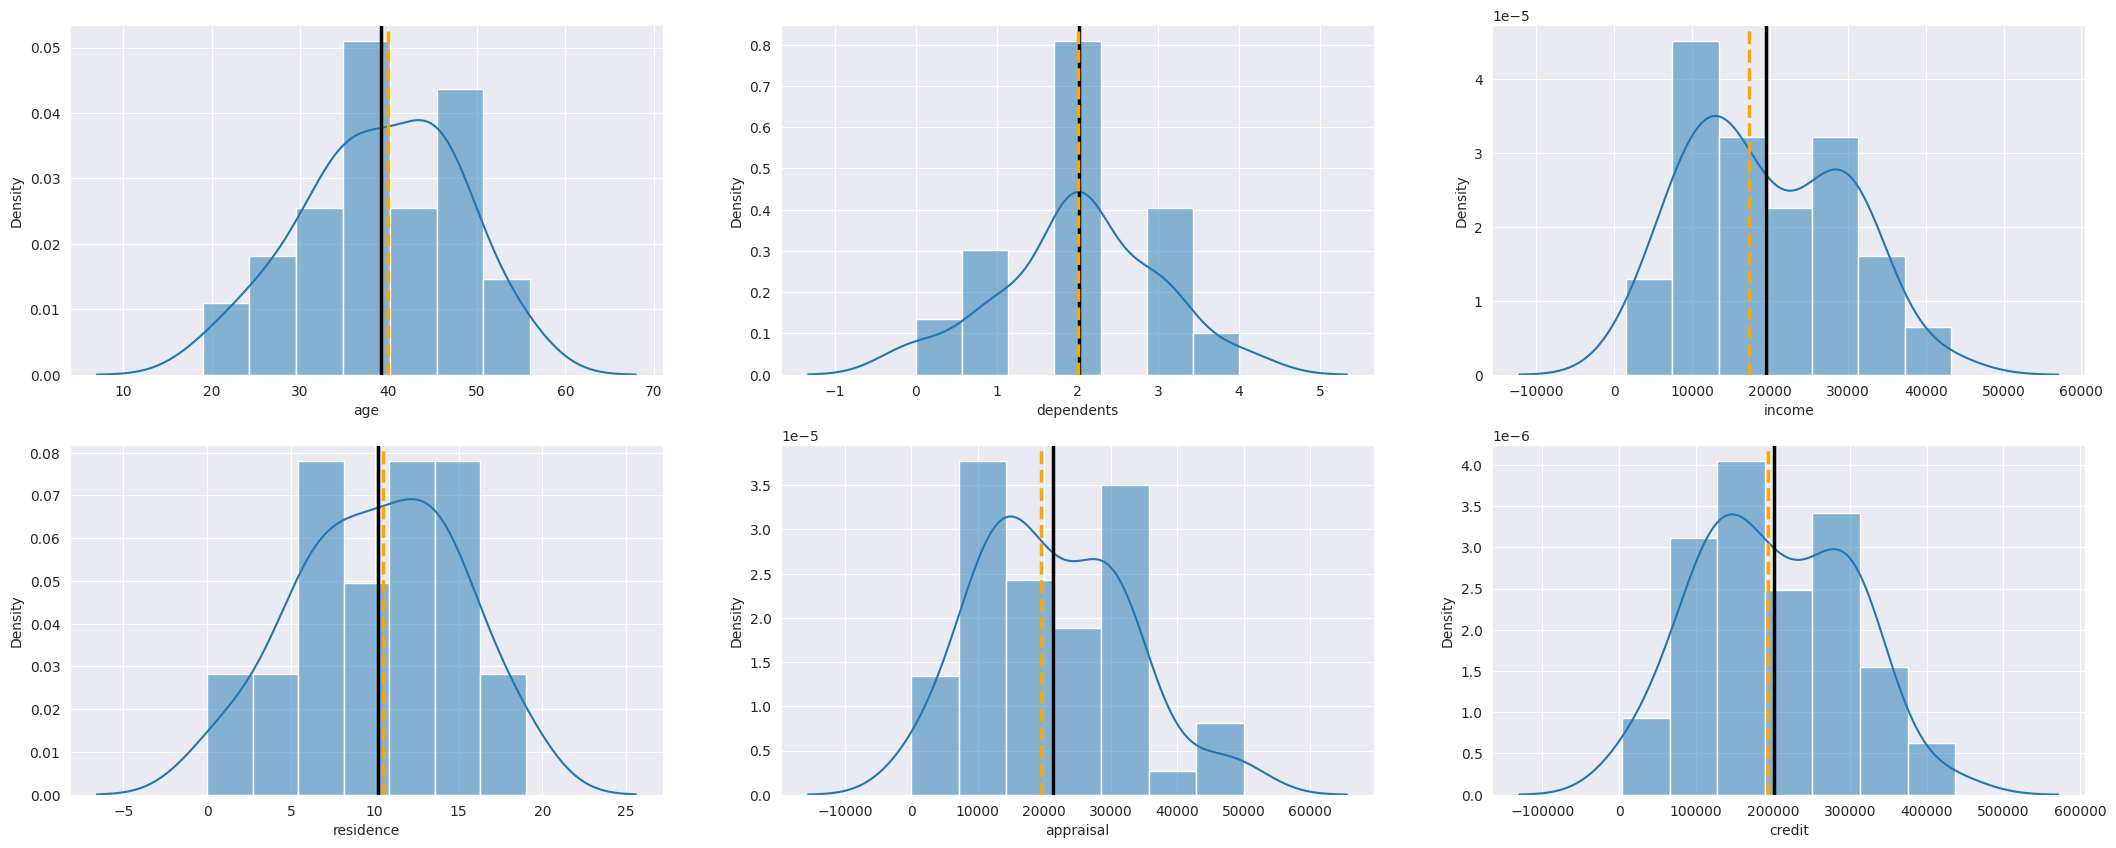

In [24]:
plot_distributions(df)

In [25]:
df.describe()

,age,dependents,income,residence,appraisal,credit
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.00000
mean,39.115385,2.019231,19495.192308,10.173077,21237.076923,201285.00000
std,8.775308,0.980004,10069.160983,4.825265,11404.908498,98525.91177
min,19.000000,0.000000,1500.000000,0.000000,0.000000,4000.00000
25%,33.000000,1.750000,12050.000000,6.750000,13000.000000,127500.00000
50%,40.000000,2.000000,17250.000000,10.500000,19500.000000,193000.00000
75%,46.000000,3.000000,28802.500000,14.000000,30000.000000,293000.00000
max,56.000000,4.000000,43300.000000,19.000000,50000.000000,437000.00000


Сравнивая с предыдущими гистограммами видим, что они практически не изменились, только у признака appraisal правая мода стала чуть более выраженной.

Матожидание и стандартное отклонение практически не изменились.

# Задание 3

В качестве метода обнаружения выбросов будем использовать метод стандартных отклонений. Он нам подходит, так как распределения наших признаков похожи на нормальные

Были использованы источники:
https://datascience.eu/ru/%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0-%D0%B8-%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0/%D1%87%D1%82%D0%BE-%D1%82%D0%B0%D0%BA%D0%BE%D0%B5-z-score/
и
https://machinelearningmastery.ru/how-to-use-statistics-to-identify-outliers-in-data/

Опытным путем было установлено, что удалив строки, в которых хотя-бы один признакотклоняются от среднего больше чем на 2 среднеквадратичных отклонения, т.е вероятность встретить данные с таким признаком меньше 5 %, осталось только 42 строки (около 20% данных было удалено).

Поэтому было принято решение увеличить доверительный интервал до 2.1 среднеквадратичных отклонения, что позволило сохранить 90% данных

In [26]:
from scipy.stats import zscore

In [27]:
prev_df_size = df.shape[0]

In [28]:
df = df.mask(~df.apply(lambda x: np.abs(zscore(x)) < 2.1, axis=0)).dropna()

Посмотрим на новую среднюю и среднеквадратичное отклонение

In [29]:
df.describe()

,age,dependents,income,residence,appraisal,credit
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,40.489362,2.021277,19088.297872,10.574468,19347.404255,191961.148936
std,7.618263,0.920524,9498.504360,4.586107,9695.618797,95327.138711
min,25.000000,0.000000,1500.000000,2.000000,0.000000,4000.000000
25%,35.000000,2.000000,12350.000000,7.000000,13000.000000,124500.000000
50%,40.000000,2.000000,16800.000000,11.000000,18000.000000,177000.000000
75%,46.000000,3.000000,28700.000000,14.000000,29000.000000,292500.000000
max,56.000000,4.000000,38000.000000,19.000000,38000.000000,377000.000000


Видим, что среднеквадратичное отклонение значительно уменьшилось

In [30]:
print('Процент удаленных выбросов', (1 - df.shape[0] / prev_df_size) * 100)

Процент удаленных выбросов 9.615384615384615


Снова построим гистограммы

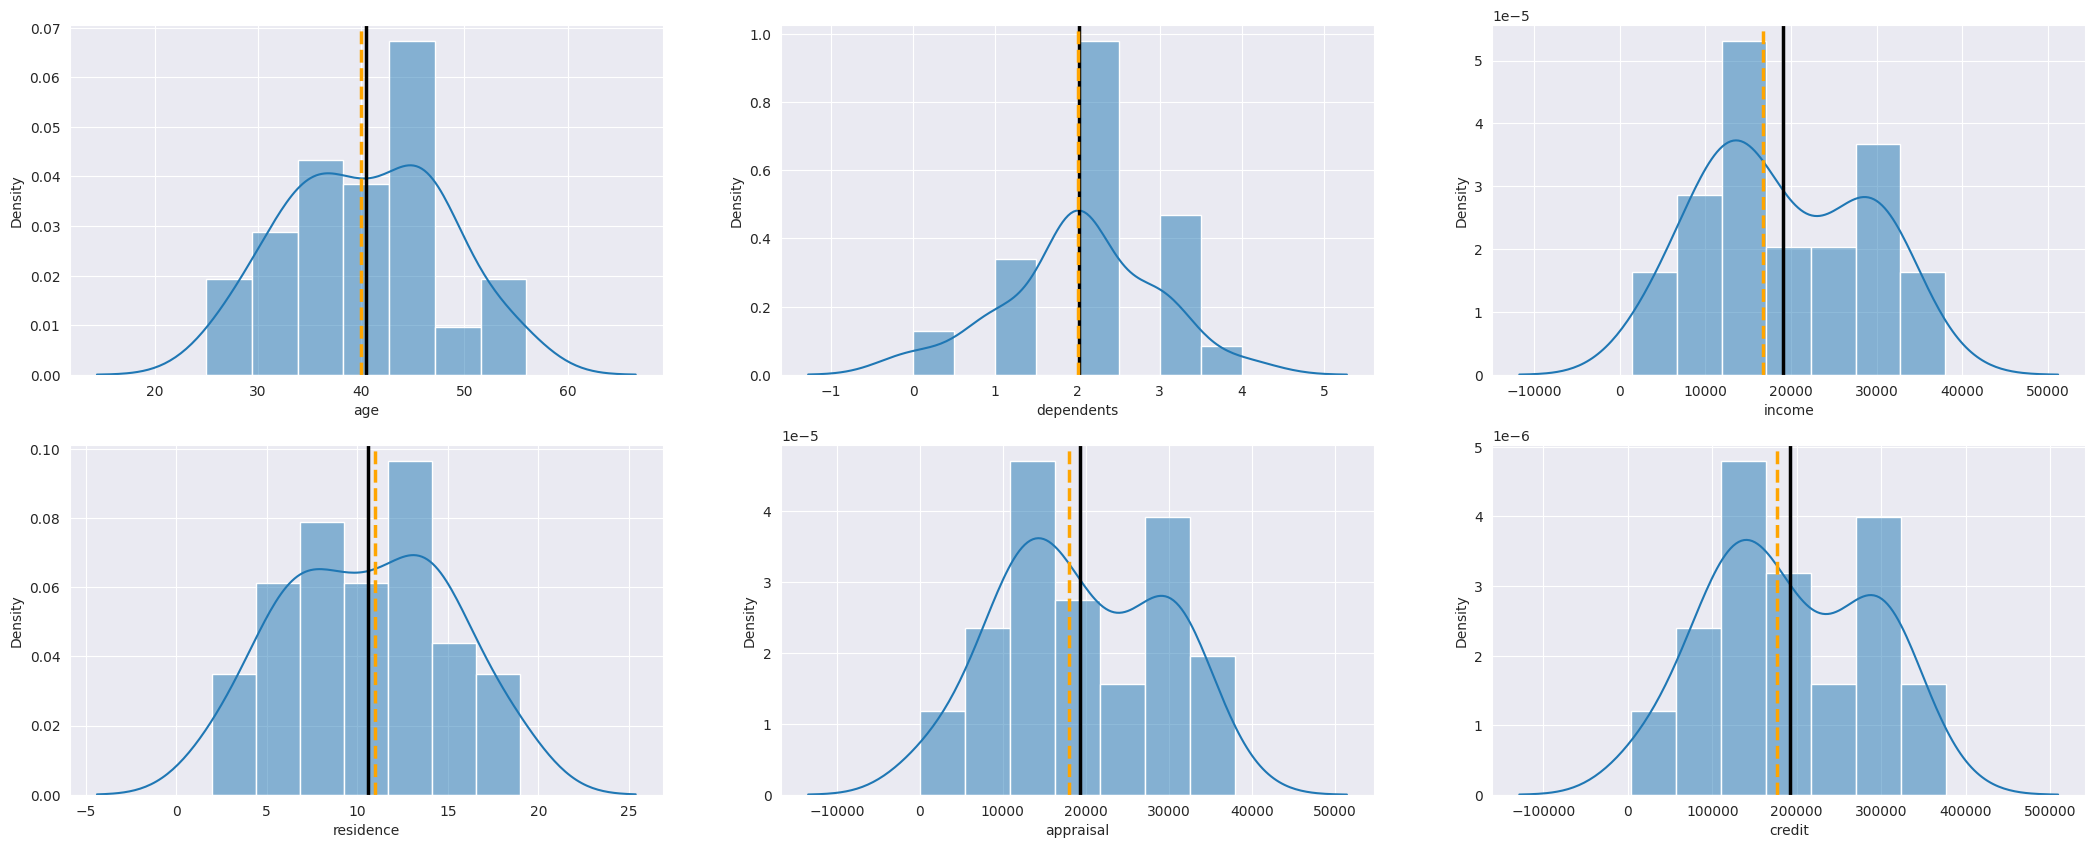

In [31]:
plot_distributions(df)

Видим, что хвосты гистограм стали толще после удаления выбросов

# Задание 4

Центрируем данные, вычитая среднее

In [33]:
Z = df - df.mean()

In [34]:
for column in Z.columns:
    l2_norm = np.linalg.norm(Z[column], ord=2)
    Z[column] = Z[column] / l2_norm


In [35]:
Z

,age,dependents,income,residence,appraisal,credit
0,0.261482,0.156764,-0.037073,0.238729,-0.020490,-0.023140
1,-0.086886,-0.003408,0.228365,-0.050619,0.222823,0.224331
2,-0.144947,-0.163580,-0.096059,-0.050619,-0.111732,-0.102022
3,0.067944,-0.003408,-0.021550,0.077980,-0.020490,-0.018500
4,0.261482,0.316936,0.014152,0.270878,0.040338,0.029447
5,0.009883,0.156764,-0.111581,0.013681,-0.111732,-0.112849
6,-0.183655,-0.163580,0.056063,-0.211367,0.040338,0.044914
7,-0.241716,-0.163580,0.155563,-0.275667,0.161995,0.167103
8,0.087298,-0.003408,-0.100716,0.077980,-0.096525,-0.098928
11,-0.009471,-0.003408,0.035884,-0.018469,0.025131,0.034087


In [36]:
for column in Z.columns:
    l2_norm = np.linalg.norm(Z[column], ord=2)
    print(column, l2_norm)

age 0.9999999999999997
dependents 1.0
income 1.0
residence 1.0
appraisal 0.9999999999999999
credit 0.9999999999999999


# Задание 5

Воспользуемся функцией svd из модуля scipy

In [37]:
U, s, VT = np.linalg.svd(Z)

Проверим правильность разложения. Для этого попробуем получить исходную матрицу. Так как массив S содержит сингулярные числа, то нужно составить диагональную матрицу

In [38]:
n_rows, n_cols = Z.shape
# Создаем матрицу n * m ( n > m )
Sigma = np.zeros((n_rows, n_cols))
# Заполняем сингулярными числами субматрицу m x m
Sigma[:n_cols, :n_cols] = np.diag(s)

In [39]:
Sigma

array([[1.78405105, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.64405772, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.31552848, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.11428059, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.0357131 ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01850284],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0

In [40]:
U.dot(Sigma.dot(VT))

array([[ 0.26148152,  0.15676394, -0.03707271,  0.23872861, -0.02049007,
        -0.02314033],
       [-0.08688599, -0.00340791,  0.2283646 , -0.05061867,  0.22282305,
         0.22433079],
       [-0.14494724, -0.16357976, -0.09605878, -0.05061867, -0.11173249,
        -0.10202174],
       [ 0.06794402, -0.00340791, -0.02155006,  0.07798012, -0.02049007,
        -0.01850024],
       [ 0.26148152,  0.31693579,  0.01415203,  0.27087831,  0.04033821,
         0.02944729],
       [ 0.00988277,  0.15676394, -0.11158143,  0.01368072, -0.11173249,
        -0.1128486 ],
       [-0.18365474, -0.16357976,  0.05606319, -0.21136716,  0.04033821,
         0.04491423],
       [-0.24171599, -0.16357976,  0.15556337, -0.27566656,  0.16199477,
         0.16710309],
       [ 0.08729777, -0.00340791, -0.10071558,  0.07798012, -0.09652542,
        -0.09892835],
       [-0.00947098, -0.00340791,  0.03588374, -0.01846898,  0.02513114,
         0.03408737],
       [ 0.10665152,  0.15676394,  0.12125832,  0.

In [41]:
Z

,age,dependents,income,residence,appraisal,credit
0,0.261482,0.156764,-0.037073,0.238729,-0.020490,-0.023140
1,-0.086886,-0.003408,0.228365,-0.050619,0.222823,0.224331
2,-0.144947,-0.163580,-0.096059,-0.050619,-0.111732,-0.102022
3,0.067944,-0.003408,-0.021550,0.077980,-0.020490,-0.018500
4,0.261482,0.316936,0.014152,0.270878,0.040338,0.029447
5,0.009883,0.156764,-0.111581,0.013681,-0.111732,-0.112849
6,-0.183655,-0.163580,0.056063,-0.211367,0.040338,0.044914
7,-0.241716,-0.163580,0.155563,-0.275667,0.161995,0.167103
8,0.087298,-0.003408,-0.100716,0.077980,-0.096525,-0.098928
11,-0.009471,-0.003408,0.035884,-0.018469,0.025131,0.034087


Видим что матрицы идентичны

# Задание 6

In [42]:
print('Сингулярные числа:', s)

Сингулярные числа: [1.78405105 1.64405772 0.31552848 0.11428059 0.0357131  0.01850284]


In [43]:
s_sqr = np.square(s)
s_sqr_sum = np.sum(s_sqr)
impact = s_sqr / s_sqr_sum
print('Квадраты сингулярных чисел:', s_sqr)
print('Сумма квадратов сингулярных чисел:', s_sqr_sum)
print('Вклад каждой компоненты:', np.around(impact, 2))

Квадраты сингулярных чисел: [3.18283816e+00 2.70292579e+00 9.95582227e-02 1.30600527e-02
 1.27542542e-03 3.42355197e-04]
Сумма квадратов сингулярных чисел: 6.0
Вклад каждой компоненты: [0.53 0.45 0.02 0.   0.   0.  ]


Видно, что два фактора дают 98% аппроксимацию, поэтому всего двух факторов достаточно для хорошей аппроксимации

Берем 2 главных фактора:

In [44]:
k = 2
primal_factors = U[:,:k]
primal_factors

array([[-6.89660770e-02,  2.22751503e-01],
       [ 2.23053965e-01, -1.02143621e-02],
       [-8.59754920e-02, -1.43400512e-01],
       [-3.45890951e-02,  4.53908458e-02],
       [-1.31049774e-02,  2.99417547e-01],
       [-9.80664841e-02,  4.40023038e-02],
       [ 7.71301589e-02, -1.85136895e-01],
       [ 1.96549118e-01, -2.07140718e-01],
       [-1.09309843e-01,  3.87786438e-02],
       [ 3.24228827e-02, -5.44346522e-03],
       [ 1.07254017e-01,  1.40628364e-01],
       [ 1.31966629e-01,  1.64004322e-01],
       [-1.83927932e-01,  1.87423879e-01],
       [-2.03051914e-01, -3.57490599e-01],
       [-1.21829710e-01,  1.33074877e-01],
       [-7.66186672e-02,  2.84385103e-04],
       [-1.67803246e-01, -1.55392857e-01],
       [ 3.07088059e-02, -5.01623077e-02],
       [ 1.86350983e-01, -1.49158518e-01],
       [-8.27996106e-02, -3.37211742e-02],
       [-1.00201646e-01,  5.90850916e-02],
       [-4.96853844e-02,  1.23202060e-01],
       [ 3.02322944e-01, -6.30715858e-02],
       [ 1.

Вычислим погрешность аппроксимации в Евклидовой норме и норме Фробениуса

In [45]:
euk_norm = s[k] / s[0]
frob_norm = np.sqrt(np.sum(s_sqr[k:]) / s_sqr_sum)

print('Погрешность в Евклидовой норме %:', euk_norm * 100)
print('Погрешность в норме Фробениуса %', frob_norm * 100)

Погрешность в Евклидовой норме %: 17.68606796712993
Погрешность в норме Фробениуса % 13.798312460705622


Найдем аппроксимацию исходной матрицы через линейную комбинацию главных факторов

In [46]:
Z_K = U.dot(Sigma[:,:k].dot(VT[:k, :]))
Z_K

array([[ 0.2309895 ,  0.19967642, -0.04360306,  0.22902519, -0.02462487,
        -0.03265002],
       [-0.07218625,  0.0295064 ,  0.2202604 , -0.09720481,  0.2165844 ,
         0.2183673 ],
       [-0.11218471, -0.15146857, -0.10133667, -0.09603323, -0.11189072,
        -0.10756327],
       [ 0.0528218 ,  0.03707806, -0.02926851,  0.05476642, -0.02513923,
        -0.02690668],
       [ 0.28819466,  0.28239587,  0.02039718,  0.2764653 ,  0.0448916 ,
         0.03461656],
       [ 0.06928307,  0.02459679, -0.09243012,  0.07853728, -0.0876037 ,
        -0.08973234],
       [-0.19753279, -0.16247525,  0.05590314, -0.1981622 ,  0.0398769 ,
         0.04667436],
       [-0.25189271, -0.16240054,  0.17198169, -0.26518621,  0.15264394,
         0.1609587 ],
       [ 0.06746864,  0.01765302, -0.10417289,  0.07823743, -0.09962743,
        -0.10165062],
       [-0.01425472,  0.00052489,  0.03157515, -0.01771652,  0.03071917,
         0.03111307],
       [ 0.1035901 ,  0.15257401,  0.12214813,  0.

Вектора ошибок аппроксимации

In [47]:
Z_approx = Z - Z_K
Z_approx

,age,dependents,income,residence,appraisal,credit
0,0.030492,-0.042912,0.006530,0.009703,0.004135,0.009510
1,-0.014700,-0.032914,0.008104,0.046586,0.006239,0.005963
2,-0.032763,-0.012111,0.005278,0.045415,0.000158,0.005542
3,0.015122,-0.040486,0.007718,0.023214,0.004649,0.008406
4,-0.026713,0.034540,-0.006245,-0.005587,-0.004553,-0.005169
5,-0.059400,0.132167,-0.019151,-0.064857,-0.024129,-0.023116
6,0.013878,-0.001105,0.000160,-0.013205,0.000461,-0.001760
7,0.010177,-0.001179,-0.016418,-0.010480,0.009351,0.006144
8,0.019829,-0.021061,0.003457,-0.000257,0.003102,0.002722
11,0.004784,-0.003933,0.004309,-0.000752,-0.005588,0.002974


Видим что ошибки аппроксимации небольшие - приближение хорошее

In [48]:
z_approx_total_sum = 0
for column in Z_approx.columns:
    vec_sum = np.square(Z_approx[column]).sum()
    z_approx_total_sum += vec_sum
    print(column, vec_sum)

print('total sum:', z_approx_total_sum, 'eucl norm:', np.sum(s_sqr[k:]))

age 0.018547999104133905
dependents 0.06497651350049187
income 0.00232830092005479
residence 0.023537375148697273
appraisal 0.0027650628993306984
credit 0.002080804485249851
total sum: 0.11423605605795838 eucl norm: 0.11423605605795842


# Задание 7

Найдем представления клиентов векторами меньшей размерности и сделаем предположения

In [49]:
primal_factors_transposed = primal_factors.transpose()
vector = np.ndarray(shape=primal_factors_transposed.shape)
cf = 9
for i, u in enumerate(primal_factors_transposed):
    max_u = np.max(u)
    min_u = np.min(u)
    vector[i] = [cf * (el - min_u) / (max_u - min_u) for el in u]

client_map = pd.DataFrame(np.around(vector.transpose(), 2))
display(client_map)
display(Z)

,0,1
0,2.86,7.61
1,7.69,4.56
2,2.58,2.81
3,3.43,5.29
4,3.78,8.62
5,2.38,5.27
6,5.28,2.26
7,7.25,1.97
8,2.19,5.20
9,4.54,4.62


,age,dependents,income,residence,appraisal,credit
0,0.261482,0.156764,-0.037073,0.238729,-0.020490,-0.023140
1,-0.086886,-0.003408,0.228365,-0.050619,0.222823,0.224331
2,-0.144947,-0.163580,-0.096059,-0.050619,-0.111732,-0.102022
3,0.067944,-0.003408,-0.021550,0.077980,-0.020490,-0.018500
4,0.261482,0.316936,0.014152,0.270878,0.040338,0.029447
5,0.009883,0.156764,-0.111581,0.013681,-0.111732,-0.112849
6,-0.183655,-0.163580,0.056063,-0.211367,0.040338,0.044914
7,-0.241716,-0.163580,0.155563,-0.275667,0.161995,0.167103
8,0.087298,-0.003408,-0.100716,0.077980,-0.096525,-0.098928
11,-0.009471,-0.003408,0.035884,-0.018469,0.025131,0.034087


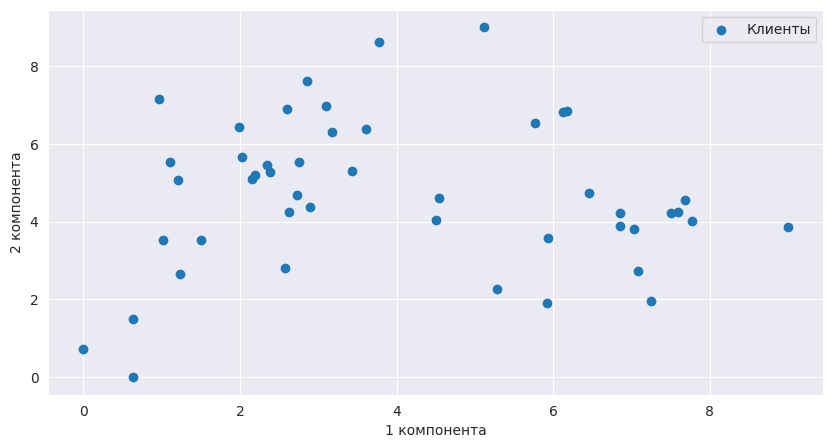

In [94]:
plt.figure(figsize=(10, 5))
plt.scatter(client_map[0], client_map[1], label='Клиенты')
plt.legend()
plt.xlabel('1 компонента')
plt.ylabel('2 компонента')
plt.show()

Проведя анализ можно заметить, что первый признак прямо коррелирует с признаками income, appraisal и credit, когда второй признак коррелирует с признаками age, dependents и residence. Можно предположить, что первый признак представляет собой платежеспособность клиента, в то время как второй признак обозначает консервативность / надежность клиента

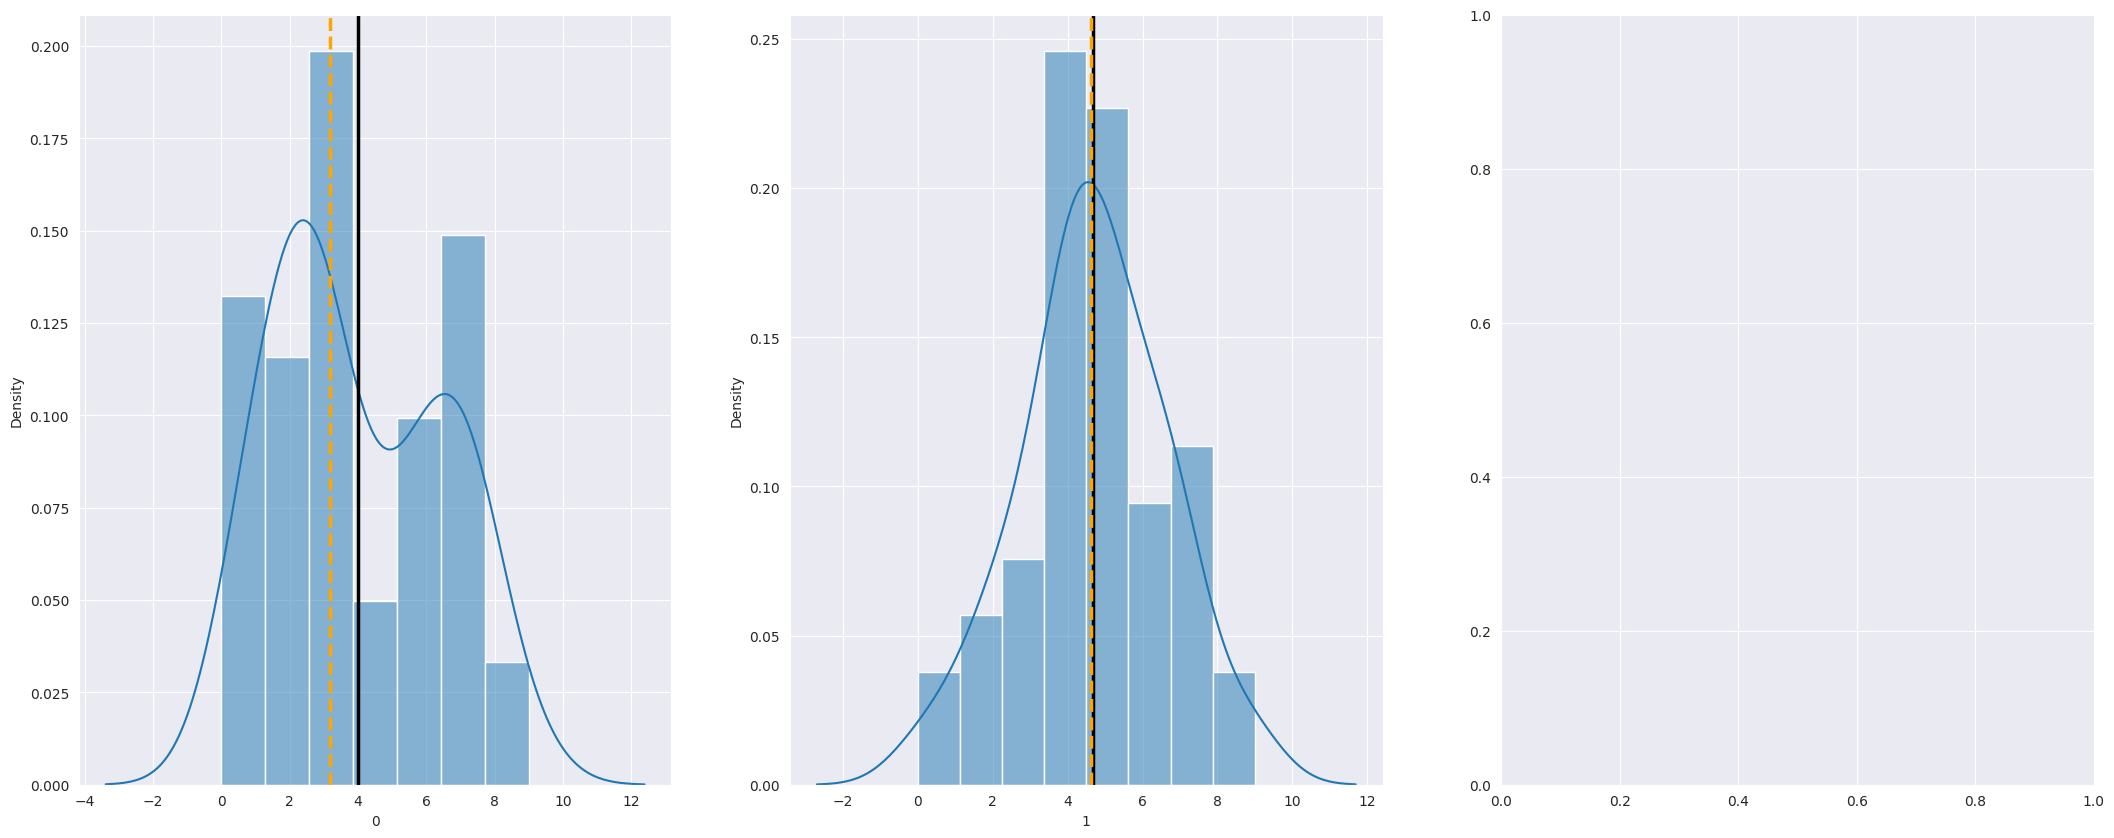

In [50]:
plot_distributions(client_map)

Видим, что клиенты банка преимущественно средний класс, хотя есть большое число клиентов с доходностью выше 6 баллов.

# Задание 8

Выпишем матрицу разложения признаков по главным факторам

In [51]:
Z_decomp = Sigma[:,:k].dot(VT[:k, :])[: k]
Z_decomp

array([[-0.28011148,  0.175826  ,  0.99258481, -0.39429792,  0.97982515,
         0.98625968],
       [ 0.95025763,  0.95084631,  0.11156656,  0.90608596,  0.19281498,
         0.15877983]])

Подтверждаем сделанные ранее выводы. Первый признак является производным от income, appraisal, credit, а второй от age, dependents и residence.

# Задание 9

Анализ PCA дал четкое разделение исходных признаков по скрытым компонентам. Что касается карты клиентов, то можно выделить 2 кластера, сделаем это алгоритмом kmeans++

In [105]:
from sklearn.cluster import KMeans
labels = KMeans(n_clusters=2, init ='k-means++', random_state=42).fit_predict(client_map[[0,1]])

In [106]:
client_map['labels'] = labels

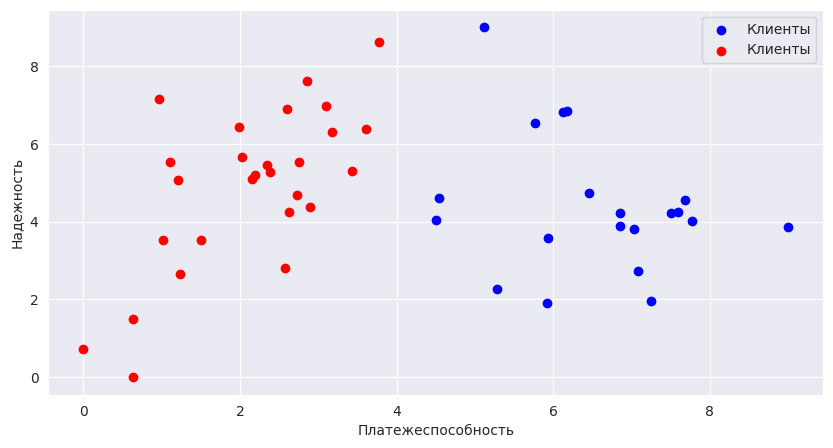

In [108]:
plt.figure(figsize=(10, 5))
plt.scatter(client_map[labels==0][0], client_map[labels==0][1], label='Клиенты', color = 'blue')
plt.scatter(client_map[labels==1][0], client_map[labels==1][1], label='Клиенты', color = 'red')
plt.legend()
plt.xlabel('Платежеспособность')
plt.ylabel('Надежность')
plt.show()

Из карты клиентов можно сделать несколько предположений:
1. Неплатежеспособные (< 2 ) клиенты скорее всего будут ненадежными
2. Основная масса клиентов это небогатые люди, однако надежные.
3. Люди с высокой платежеспособностью обладают в среднем меньшей надежностью чем люди с платежеспособностью ниже

# Задание 10

Для вычисления расстояния между клиентами будем использовать частоиспользуемое Евклидово расстояние, так как не было выявлено признаков, которые позволили бы определить идеальную метрику расстояний.

Вычислим матрицу расстояний

In [115]:
from sklearn.metrics.pairwise import euclidean_distances

distances = euclidean_distances(Z)
print(distances)

[[0.         0.91685305 0.8667146  ... 0.87320283 1.11842638 0.46187134]
 [0.91685305 0.         0.84829943 ... 0.35323184 0.55438996 1.02834831]
 [0.8667146  0.84829943 0.         ... 0.53718726 0.53550169 0.54541894]
 ...
 [0.87320283 0.35323184 0.53718726 ... 0.         0.29141382 0.82925117]
 [1.11842638 0.55438996 0.53550169 ... 0.29141382 0.         0.98170619]
 [0.46187134 1.02834831 0.54541894 ... 0.82925117 0.98170619 0.        ]]


# Задание 11

Найдем матрицу Грама и, если она симметрична и ее собственные значения положительно определены - клиентов можно поместить в пространство размерности 2 с сохранием расстояний между клиентами

In [156]:
C = np.eye(distances.shape[0]) - 1 / distances.shape[0] * np.ones((distances.shape[0], distances.shape[0]))
B = - 1/2 * C @ (distances ** 2) @ C
print(np.around(np.linalg.eigvalsh(B), 5))

[-0.00000e+00 -0.00000e+00 -0.00000e+00 -0.00000e+00 -0.00000e+00
 -0.00000e+00 -0.00000e+00 -0.00000e+00 -0.00000e+00 -0.00000e+00
 -0.00000e+00 -0.00000e+00 -0.00000e+00 -0.00000e+00 -0.00000e+00
 -0.00000e+00 -0.00000e+00 -0.00000e+00 -0.00000e+00 -0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  3.30000e-04
  3.70000e-04  1.20000e-03  1.49000e-03  1.30700e-02  9.98700e-02
  5.45753e+00  6.41957e+00]


Все собственные значения положительно определены.

In [155]:
t = np.around(B, 5)
(t==t.T).all()

True

Матрица симметрична

Делаем вывод что клиентов можно поместить в евклидово пространство размерности 2

# Задание 12

Используем нормализованные данные Z для понижения размерности

In [169]:
from sklearn.manifold import MDS
n_components = 2
embedding = MDS(n_components=n_components, n_init = 20, max_iter = 10000, random_state = 42, dissimilarity='precomputed')
MDS_transformed = embedding.fit_transform(distances)
MDS_transformed.shape

(47, 2)

In [170]:
MDS_transformed

array([[-0.54182077,  0.12261134],
       [ 0.30434791,  0.48596686],
       [ 0.18528442, -0.36005753],
       [-0.1338278 , -0.01554072],
       [-0.61264628,  0.33953673],
       [-0.22880396, -0.23547135],
       [ 0.471136  , -0.05354677],
       [ 0.67312513,  0.17213722],
       [-0.21866865, -0.18139628],
       [ 0.05246547,  0.06673666],
       [-0.14103738,  0.40103902],
       [-0.15629421,  0.48558604],
       [-0.61602778, -0.17426956],
       [ 0.46743605, -0.86422152],
       [-0.44201187, -0.10168992],
       [-0.0932304 , -0.16372583],
       [ 0.10156348, -0.54923734],
       [ 0.144629  ,  0.00602548],
       [ 0.55513199,  0.22450134],
       [-0.029432  , -0.22104133],
       [-0.25372307, -0.13959485],
       [-0.31505603,  0.05003989],
       [ 0.52070436,  0.57867788],
       [ 0.37308309,  0.31840057],
       [-0.20121104, -0.197184  ],
       [-0.15915574,  0.47698766],
       [-0.05764103, -0.50457695],
       [-0.01314701, -0.44415258],
       [ 0.218842  ,

Оценим ошибку размещения (квадрат разницы между идеальным расстоянием и актуальным расстоянием в 2-мерном пространстве)

In [171]:
embedding.stress_

0.2155459352944989

Ошибка очень мала, скорее всего погрешность вычислений

Построим карту клиентов mds и pca, сравним их между собой

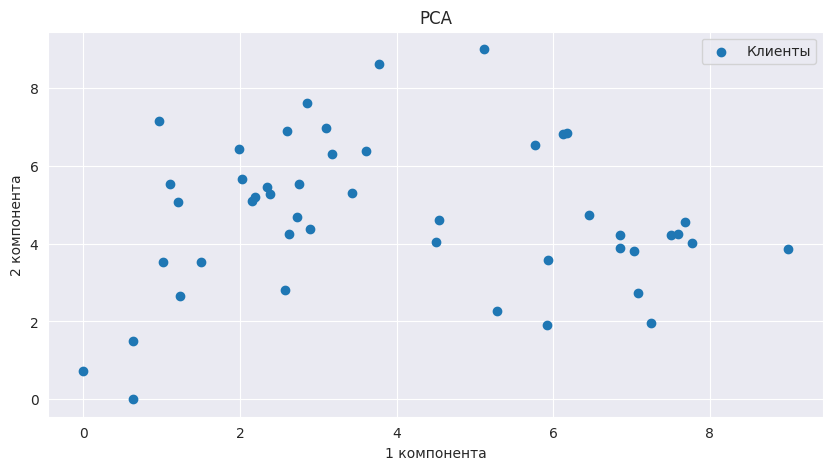

In [173]:
plt.figure(figsize=(10, 5))
plt.scatter(client_map[0], client_map[1], label='Клиенты')
plt.title('PCA')
plt.legend()
plt.xlabel('1 компонента')
plt.ylabel('2 компонента')
plt.show()

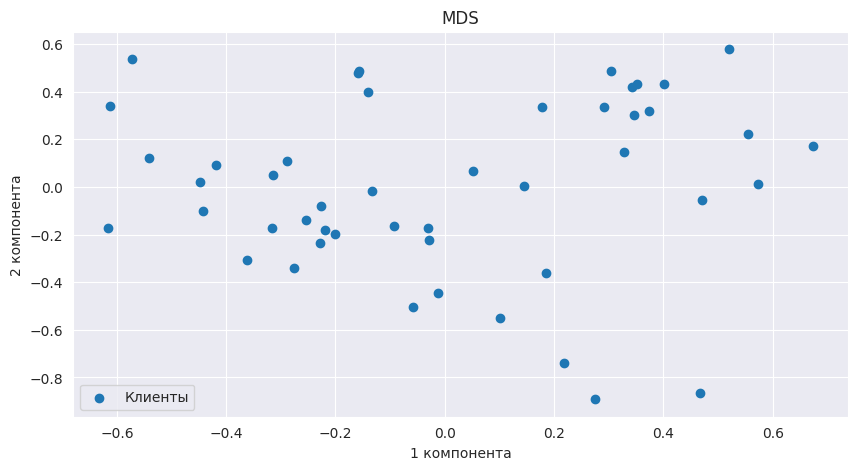

In [182]:
plt.figure(figsize=(10, 5))
plt.scatter(MDS_transformed[:, 0], MDS_transformed[:, 1], label='Клиенты')
plt.legend()
plt.title('MDS')
plt.xlabel('1 компонента')
plt.ylabel('2 компонента')
plt.show()

Можно заметить, что график MDS также содержит 2 кластера и напоминает график MDA, повернутый на 90 градусов